In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, plot_importance
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import numpy as np

from feature_importance_techniques import *

In [2]:
FREQ = "1D"

In [3]:
def get_test_data(
    n_features=40, n_informative=10, n_redundant=10, n_samples=10000, n_classes=2, weights=[0.5, 0.5], shuffle=True
):
    # generate a random dataset for a classification problem
    from sklearn.datasets import make_classification

    trnsX, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        shuffle=shuffle,
        n_classes=n_classes,
        weights=weights,
    )
    df = pd.date_range(periods=n_samples, end=pd.datetime.today(), freq=FREQ)
    df0 = pd.DatetimeIndex(df)
    trnsX, y = pd.DataFrame(trnsX, index=df0), pd.Series(y, index=df0)
    df0 = ["I_" + str(i) for i in range(n_informative)] + ["R_" + str(i) for i in range(n_redundant)]
    df0 += ["N_" + str(i) for i in range(n_features - len(df0))]
    trnsX.columns = df0

    return trnsX, y

In [4]:
X, y = get_test_data(12, 4, 6, n_samples=1000)

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [5]:
clf = LGBMClassifier()
cv = StratifiedKFold(n_splits=10)
scores = cv_score(clf, X, y, f1_score, cv)

FOLD: 1 SCORE: 0.8514851485148515
FOLD: 2 SCORE: 0.9108910891089109
FOLD: 3 SCORE: 0.9411764705882353
FOLD: 4 SCORE: 0.8846153846153846
FOLD: 5 SCORE: 0.9215686274509804
FOLD: 6 SCORE: 0.92
FOLD: 7 SCORE: 0.8817204301075269
FOLD: 8 SCORE: 0.8867924528301886
FOLD: 9 SCORE: 0.9292929292929293
FOLD: 10 SCORE: 0.923076923076923


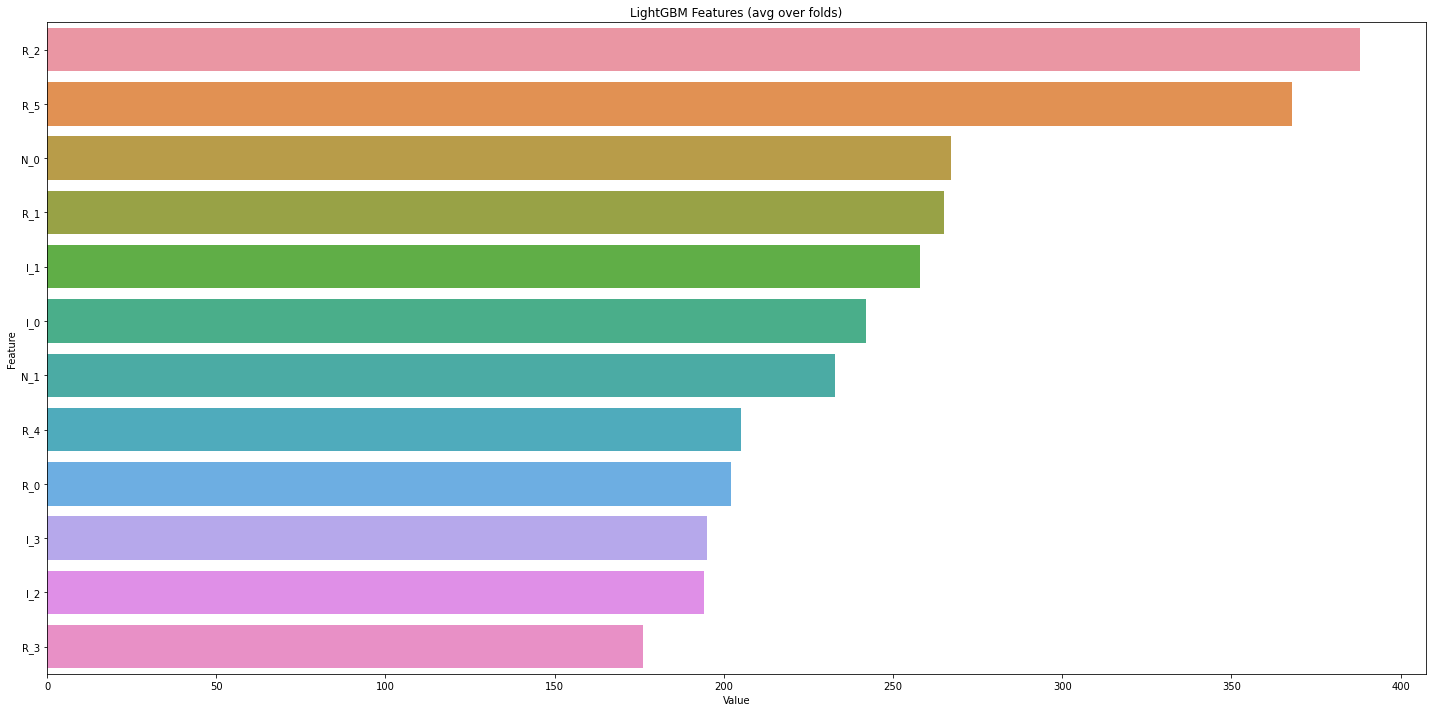

<Figure size 432x288 with 0 Axes>

In [6]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances.png')

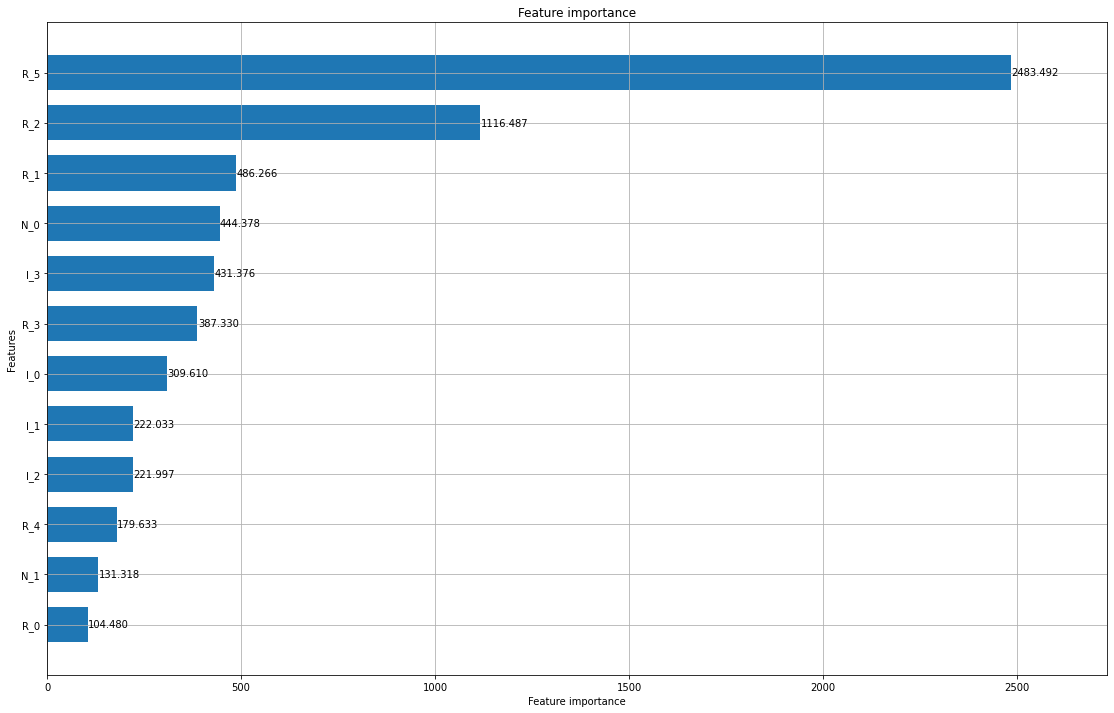

In [7]:
plot_importance(
    clf, 
    height=0.7,
    title='Feature importance', 
    xlabel='Feature importance', 
    ylabel='Features', 
    importance_type='gain', 
    grid=True, 
    precision=3,
    figsize=(19, 12)
);

In [8]:
df, imp = compute_feature_importance(
        X,
        y,
        cv,
        f1_score,
        clf=clf,
        methods=["MDA", "SFI", "MDI", "MI", "CFI", "SHAP"],
)

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


FOLD: 1 SCORE: 0.8514851485148515
FOLD: 2 SCORE: 0.9108910891089109
FOLD: 3 SCORE: 0.9411764705882353
FOLD: 4 SCORE: 0.8846153846153846
FOLD: 5 SCORE: 0.9215686274509804
FOLD: 6 SCORE: 0.92
FOLD: 7 SCORE: 0.8817204301075269
FOLD: 8 SCORE: 0.8867924528301886
FOLD: 9 SCORE: 0.9292929292929293
FOLD: 10 SCORE: 0.923076923076923
FOLD: 1 SCORE: 0.5098039215686274
FOLD: 2 SCORE: 0.4791666666666667
FOLD: 3 SCORE: 0.54
FOLD: 4 SCORE: 0.5607476635514018
FOLD: 5 SCORE: 0.4772727272727273
FOLD: 6 SCORE: 0.6153846153846153
FOLD: 7 SCORE: 0.4367816091954023
FOLD: 8 SCORE: 0.5510204081632654
FOLD: 9 SCORE: 0.6095238095238096
FOLD: 10 SCORE: 0.5199999999999999
FOLD: 1 SCORE: 0.45454545454545453
FOLD: 2 SCORE: 0.46464646464646464
FOLD: 3 SCORE: 0.5957446808510639
FOLD: 4 SCORE: 0.4509803921568628
FOLD: 5 SCORE: 0.5294117647058824
FOLD: 6 SCORE: 0.5208333333333334
FOLD: 7 SCORE: 0.5306122448979592
FOLD: 8 SCORE: 0.49484536082474223
FOLD: 9 SCORE: 0.5471698113207547
FOLD: 10 SCORE: 0.5357142857142858
FOL

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


MDA
SFI
MDI
MI
CFI
SHAP


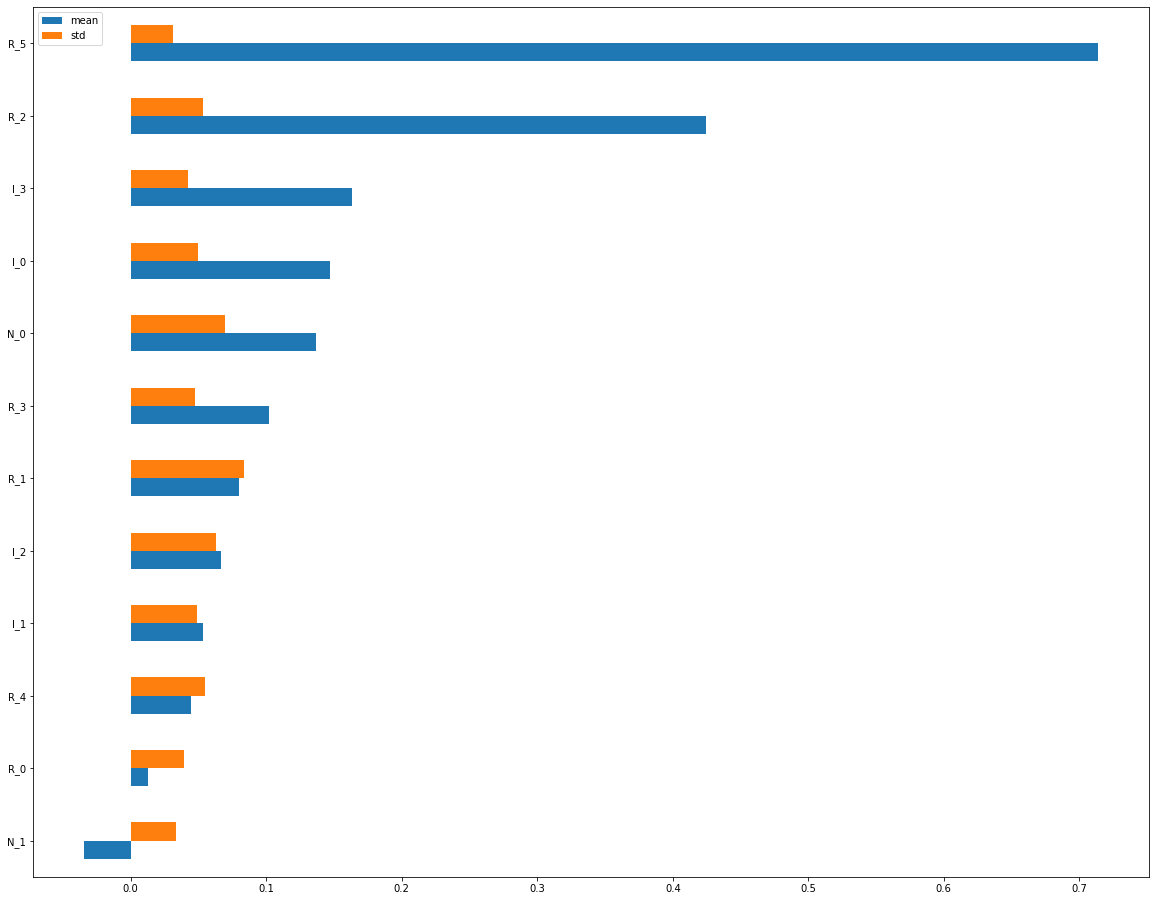

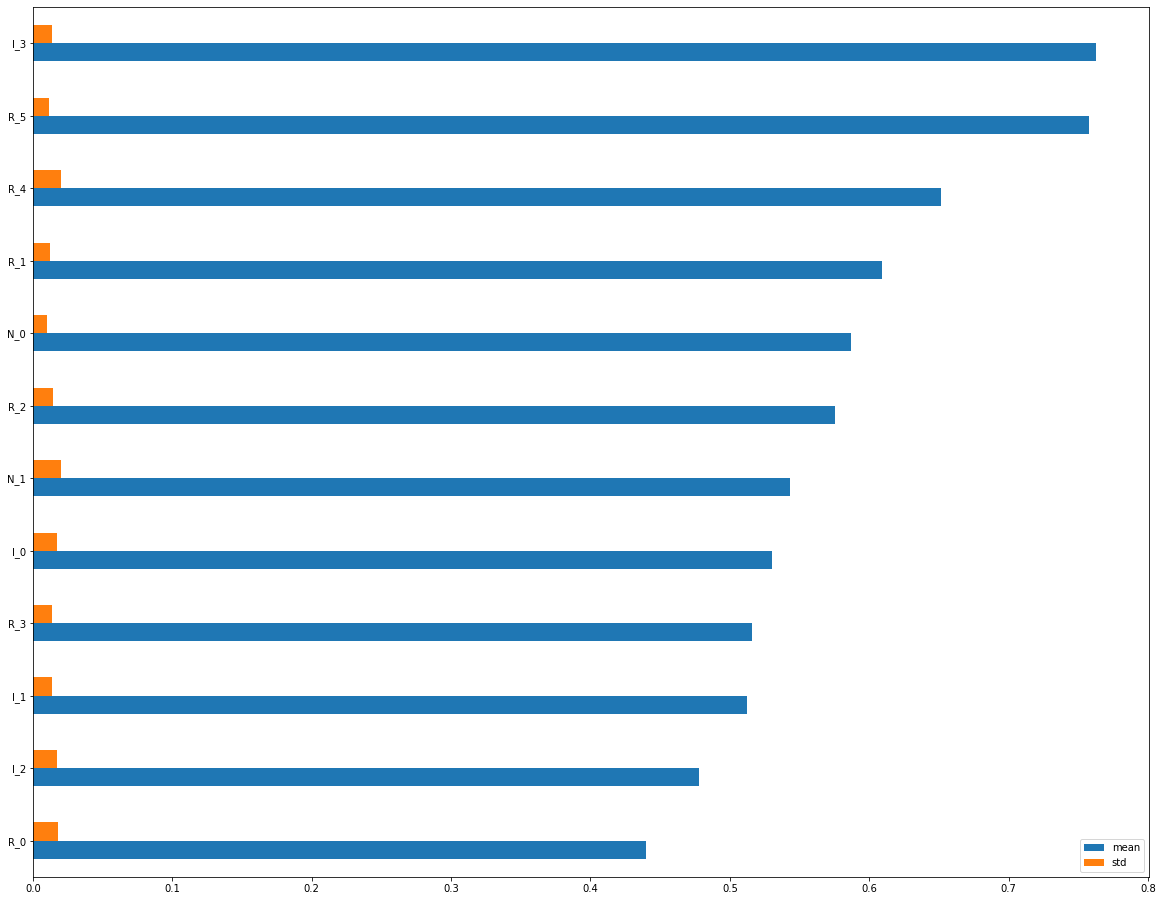

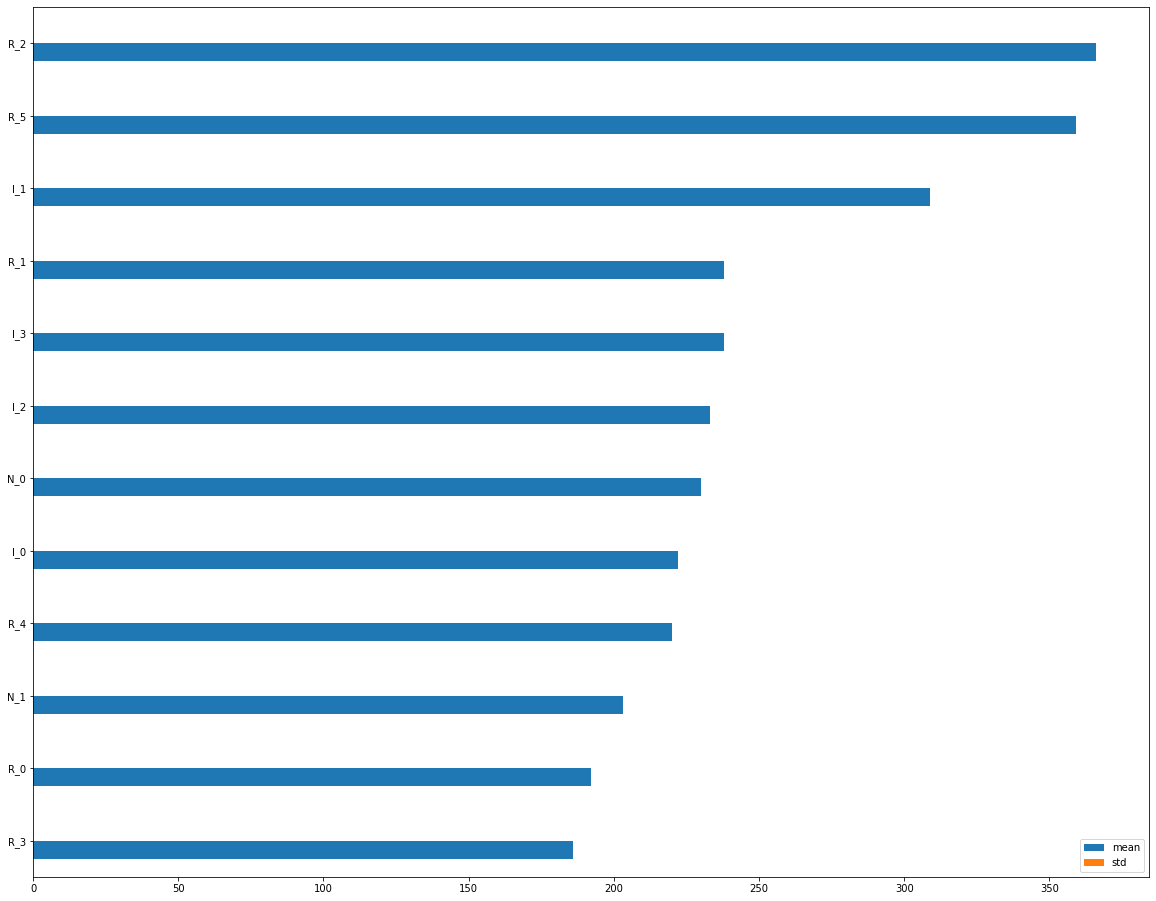

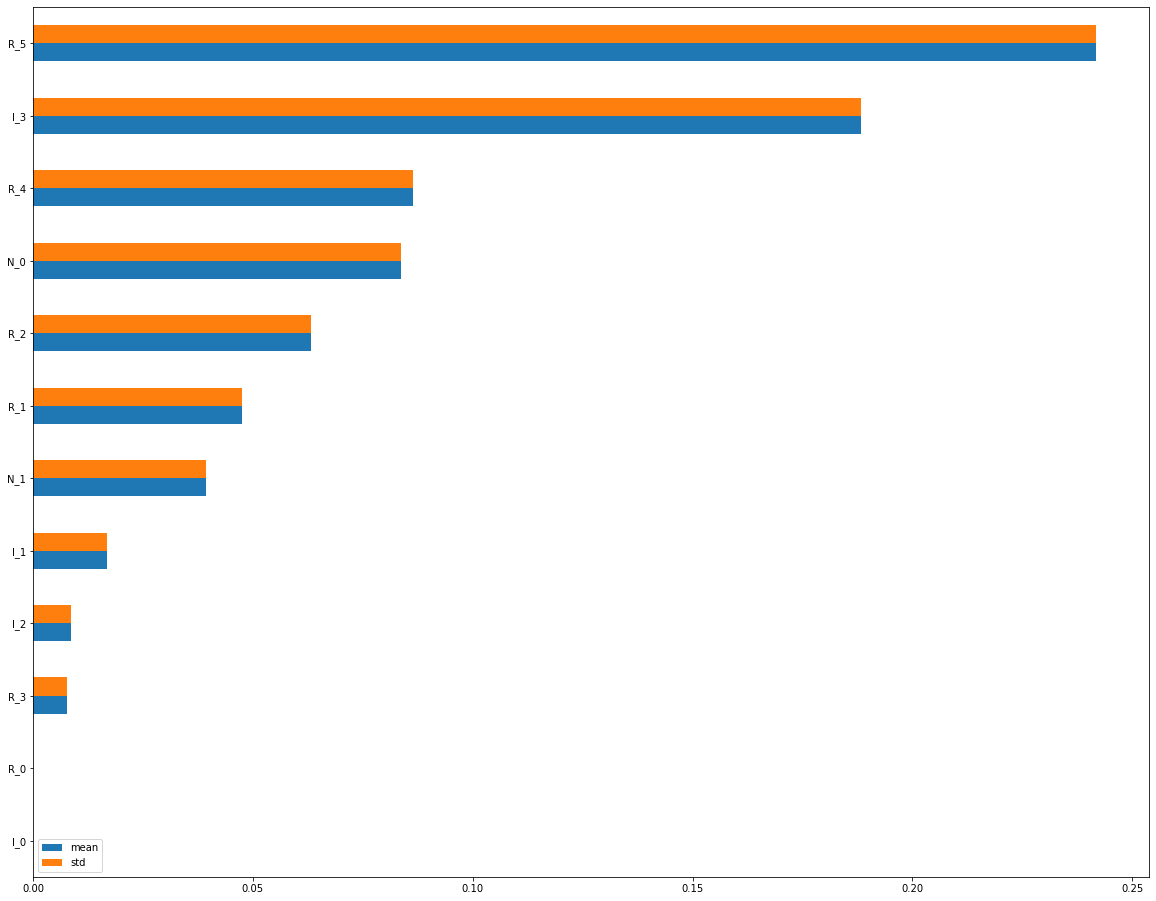

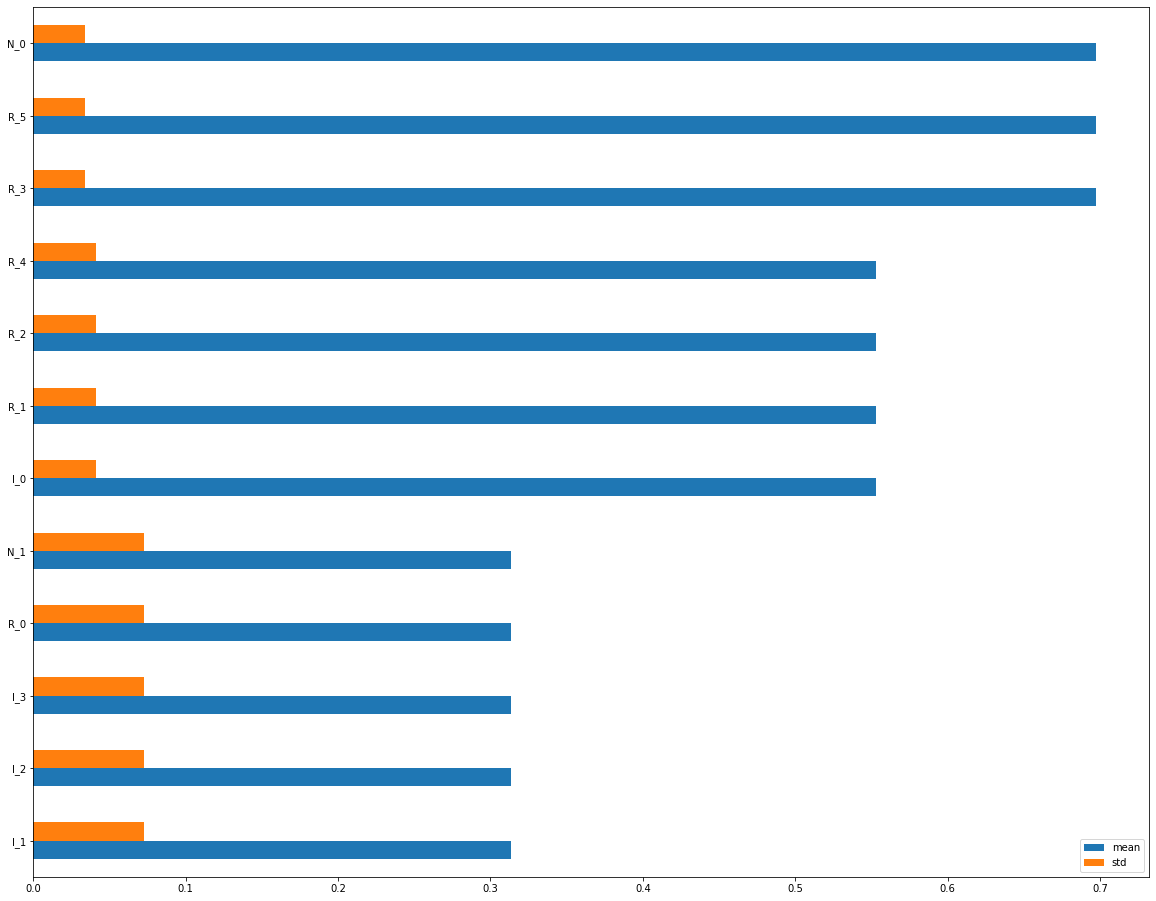

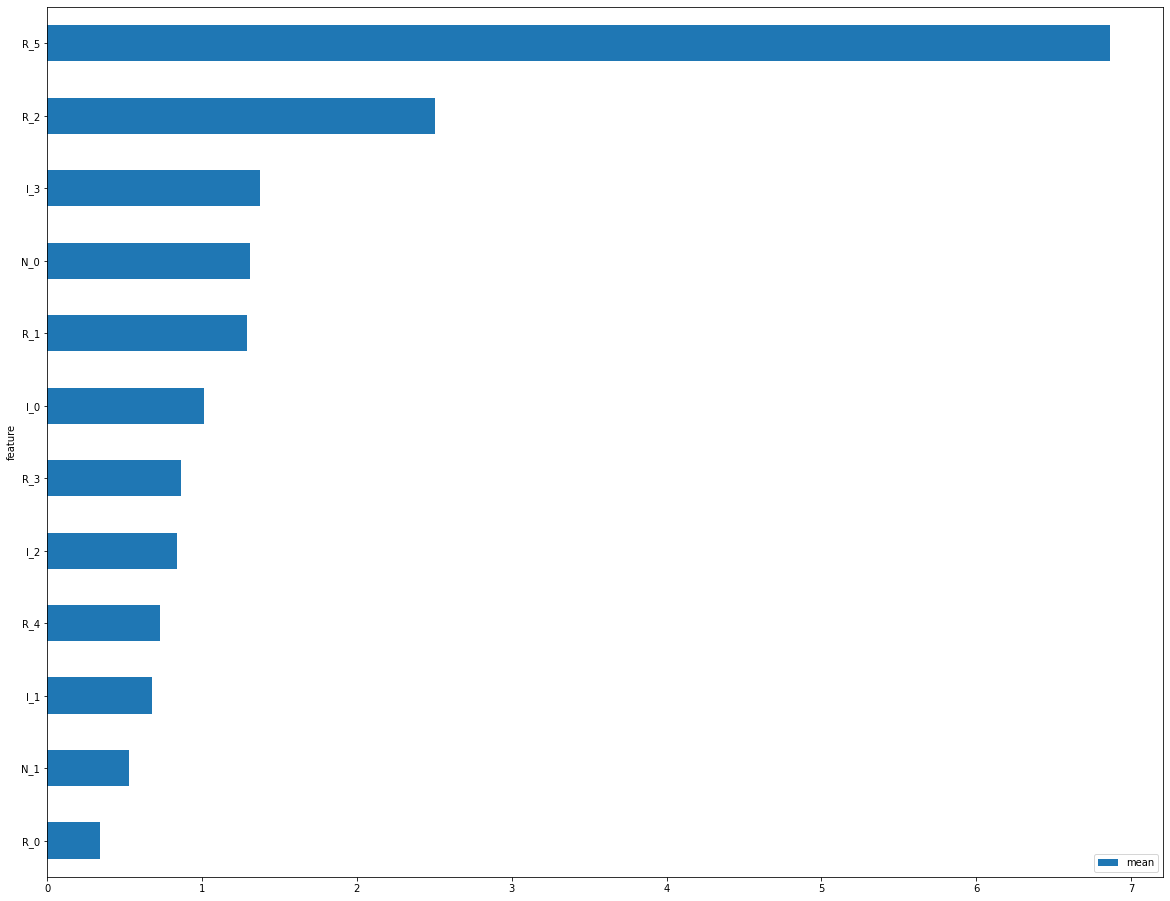

In [9]:
for name_i, importance_i in zip(df['method'], imp):
    print(name_i)
    importance_i.sort_values('mean').plot.barh(figsize=(20, 16))

In [10]:
importances = df.drop(columns='oos', axis=1).set_index('method')

In [11]:
importances.mean().sort_values(ascending=False)

R_5    0.231851
R_2    0.121770
I_3    0.106687
N_0    0.087872
R_4    0.072248
R_1    0.072081
I_0    0.062347
R_3    0.060602
I_1    0.052602
I_2    0.048373
N_1    0.043448
R_0    0.034296
dtype: float64

In [12]:
importances.median().sort_values(ascending=False)

R_5    0.214195
R_2    0.108169
R_4    0.083495
I_3    0.080918
N_0    0.080553
R_1    0.074983
I_0    0.074286
R_3    0.056877
N_1    0.051851
I_2    0.049557
I_1    0.045158
R_0    0.036029
dtype: float64

In [13]:
importances.std().sort_values(ascending=False)

R_5    0.129076
I_3    0.067919
R_2    0.050561
R_3    0.035759
R_4    0.034406
N_1    0.034225
I_0    0.032942
I_1    0.031184
R_0    0.029280
I_2    0.024172
N_0    0.020385
R_1    0.019621
dtype: float64